In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
sample = np.random.normal(loc = 22, scale = 3, size = 1000)
tips = sns.load_dataset('tips')

Distribution of data is the foremost thing that we need to understand while analysing the data.

# `sns.displot` (Figure-level function)

Contains axes-level functions:
- kdeplot
- ecdfplot
- rugplot
- histplot

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


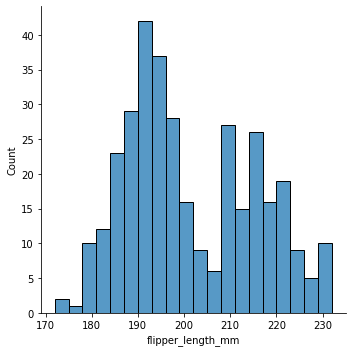

In [3]:
sns.displot(data = penguins, x = 'flipper_length_mm', binwidth = 3)

Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. For example, what accounts for the bimodal distribution of flipper lengths that we saw above?

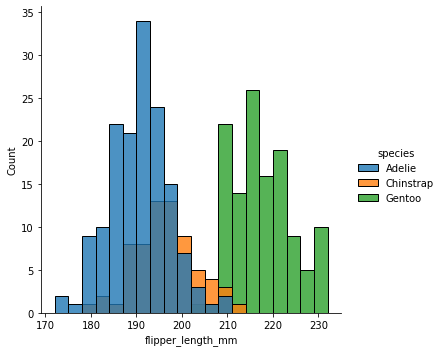

In [21]:
sns.displot(data = penguins, x = 'flipper_length_mm', binwidth = 3, hue = 'species', alpha = .8)

By default, the different histograms are “layered” on top of each other and, in some cases, they may be difficult to distinguish. One option is to change the visual representation of the histogram from a bar plot to a “step” plot:

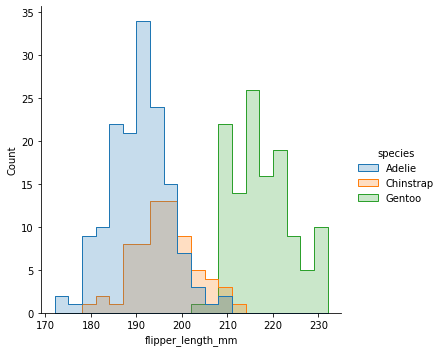

In [23]:
sns.displot(data = penguins, x = 'flipper_length_mm', binwidth = 3, hue = 'species', element = 'step')

It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. Discrete bins are automatically set for categorical variables, but it may also be helpful to “shrink” the bars slightly to emphasize the categorical nature of the axis:

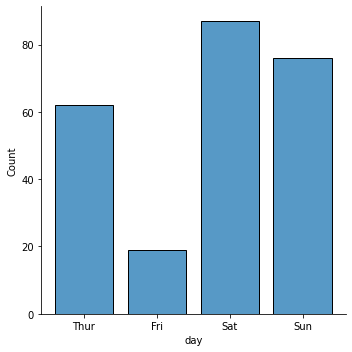

In [18]:
sns.displot(tips, x="day", shrink=0.8)

Faceting because **`sns.displot`** is a figure-level function

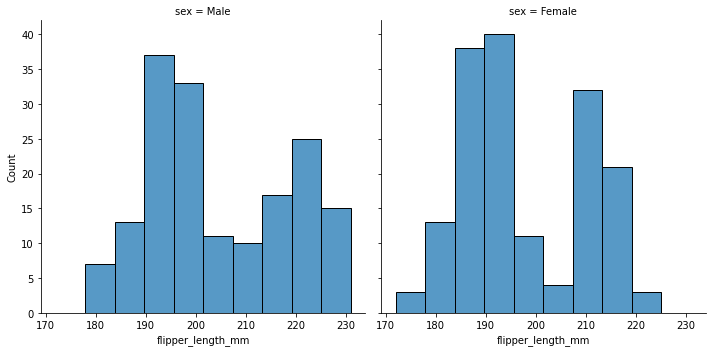

In [26]:
sns.displot(data = penguins, x = 'flipper_length_mm', col = 'sex')

KDE plot

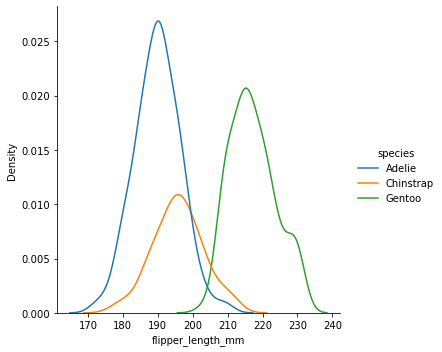

In [38]:
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', kind = 'kde')


# sns.distplot (deprecated)

**`sns.distplot`**

```python
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
```

In [5]:
# help(sns.distplot)

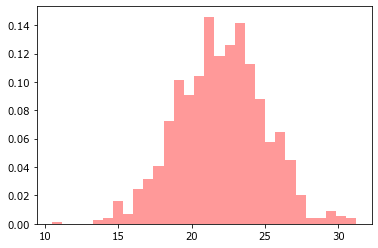

In [25]:
#histogram with 30 bins, normalized, color = 'red'
fig, ax = plt.subplots()
sns.distplot(sample, ax = ax, hist = True, kde = False, norm_hist=True, bins = 30, color = 'r')

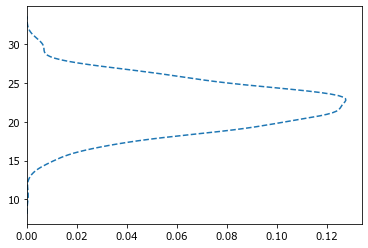

In [26]:
#kde, vertical
fig, ax = plt.subplots()
sns.distplot(sample, hist = False, kde = True, ax = ax, vertical = True)
#set linestyle for kde
ax.lines[0].set_linestyle('--')

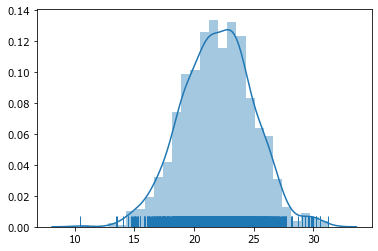

In [17]:
#kde + hist, normalized
sns.distplot(sample, hist = True, kde = True, norm_hist = True)

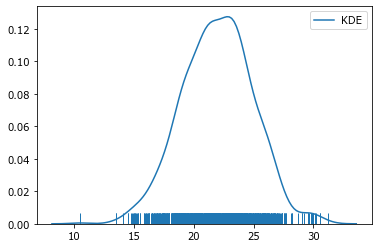

In [27]:
#kde + event collector(rug = True)
sns.distplot(sample, kde = True, rug = True, hist = False)

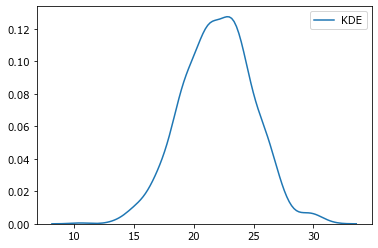

In [36]:
#adding legend (label = str)
sns.distplot(sample, kde = True, hist = False, label = 'KDE')

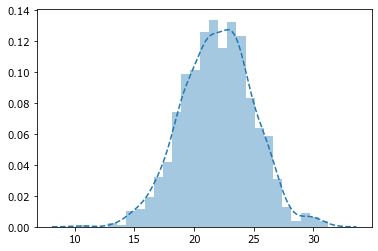

In [40]:
#customize kde: kde_kws
#customize hist: hist_kws
sns.distplot(sample, kde = True, kde_kws = dict(ls = '--'))

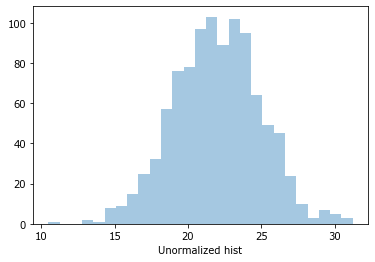

In [42]:
#set axis label
sns.distplot(sample, hist = True, norm_hist = False, kde = False, axlabel = 'Unormalized hist')

# `sns.histplot` (Axes-level function)

In [6]:
# see document help
# ?sns.histplot

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

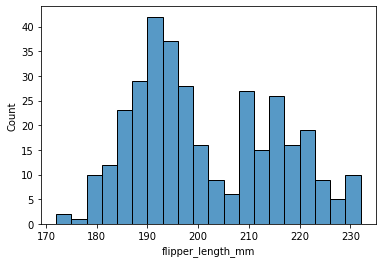

In [7]:
# set binwidth
sns.histplot(data = penguins, x = 'flipper_length_mm', binwidth = 3)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

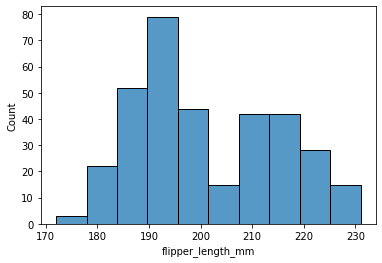

In [8]:
# choose the number of bins
sns.histplot(data = penguins, x = 'flipper_length_mm', bins = 10)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

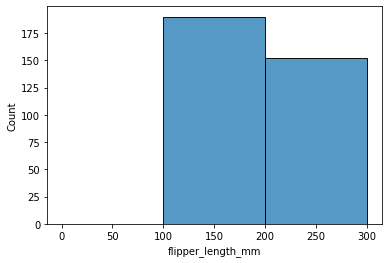

In [9]:
# specify bin breaks
sns.histplot(data = penguins, x = 'flipper_length_mm', bins = [1, 10, 50, 100, 200, 300])

# `sns.kdeplot`(Axes-level function)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

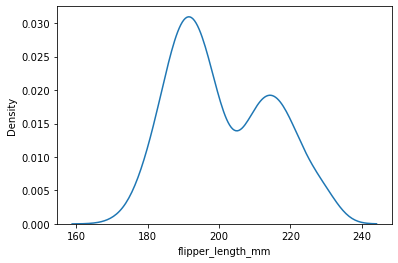

In [27]:
sns.kdeplot(data = penguins, x = 'flipper_length_mm')

Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

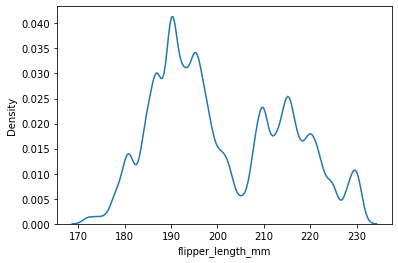

In [29]:
sns.kdeplot(data = penguins, x = 'flipper_length_mm', bw_adjust = .25)

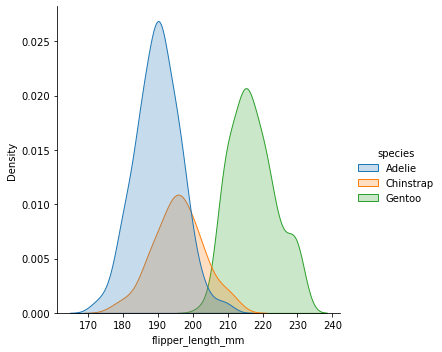

In [30]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

**Kernel density estimation pitfalls**  
KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a varible reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:



<AxesSubplot:xlabel='total_bill', ylabel='Density'>

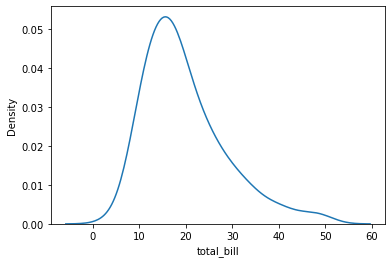

In [31]:
# the total bill cannot be negative
sns.kdeplot(data = tips, x = 'total_bill')

This can be partially avoided with the `cut` parameter, which specifies how far the curve should extend beyond the extreme datapoints. But this influences only where the curve is drawn; the density estimate will still smooth over the range where no data can exist, causing it to be artifically low at the extremes of the distribution:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

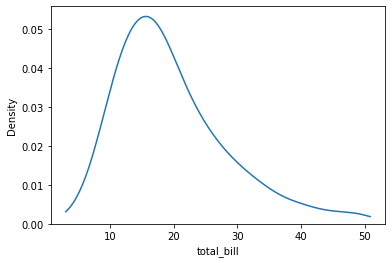

In [32]:
sns.kdeplot(data = tips, x = 'total_bill', cut = 0)

The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented. The important thing to keep in mind is that the KDE will always show you a smooth curve, even when the data themselves are not smooth. For example, consider this distribution of diamond weights:

<AxesSubplot:xlabel='carat', ylabel='Density'>

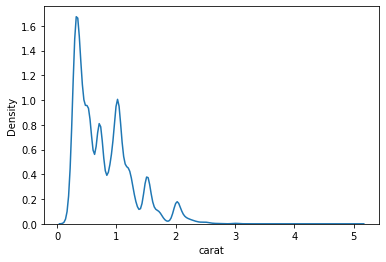

In [35]:
diamonds = sns.load_dataset('diamonds')
sns.kdeplot(data = diamonds, x = 'carat')

While the KDE suggests that there are peaks around specific values, the histogram reveals a much more jagged distribution:

<AxesSubplot:xlabel='carat', ylabel='Count'>

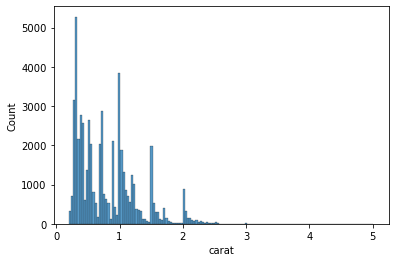

In [36]:
sns.histplot(data = diamonds, x = 'carat')

As a compromise, it is possible to combine these two approaches. 

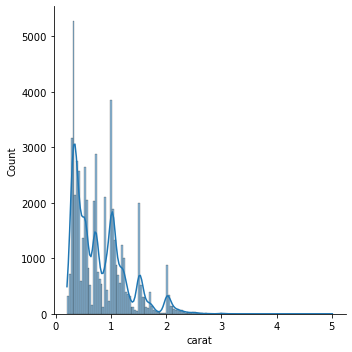

In [37]:
sns.displot(data = diamonds, x = 'carat', kde = True)

# `sns.ecdf` (Axes-level function)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

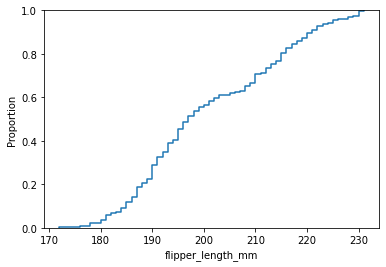

In [39]:
sns.ecdfplot(data = penguins, x = 'flipper_length_mm')

The ECDF plot has two key advantages. Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider. Additionally, because the curve is monotonically increasing, it is well-suited for comparing multiple distributions:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

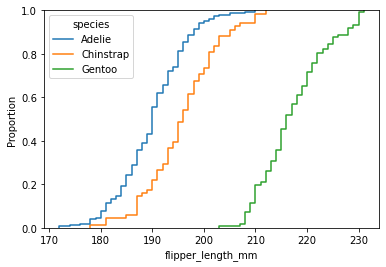

In [40]:
sns.ecdfplot(data = penguins, x = 'flipper_length_mm', hue = 'species')

The major downside to the ECDF plot is that it represents the shape of the distribution less intuitively than a histogram or density curve. Consider how the bimodality of flipper lengths is immediately apparent in the histogram, but to see it in the ECDF plot, you must look for varying slopes. Nevertheless, with practice, you can learn to answer all of the important questions about a distribution by examining the ECDF, and doing so can be a powerful approach.

